Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
# Here, we are reading the dataset which is in csv format

diabetes = pd.read_csv('/content/diabetes.csv')
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Exploratory Data Analysis (EDA)


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [ ]:
# Now let’s check that if our dataset have null values or not

diabetes.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
# Now let’s check the number of null values our dataset has.

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [ ]:
diabetes_df = diabetes.copy(deep = True)
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns.

Data Visulaization

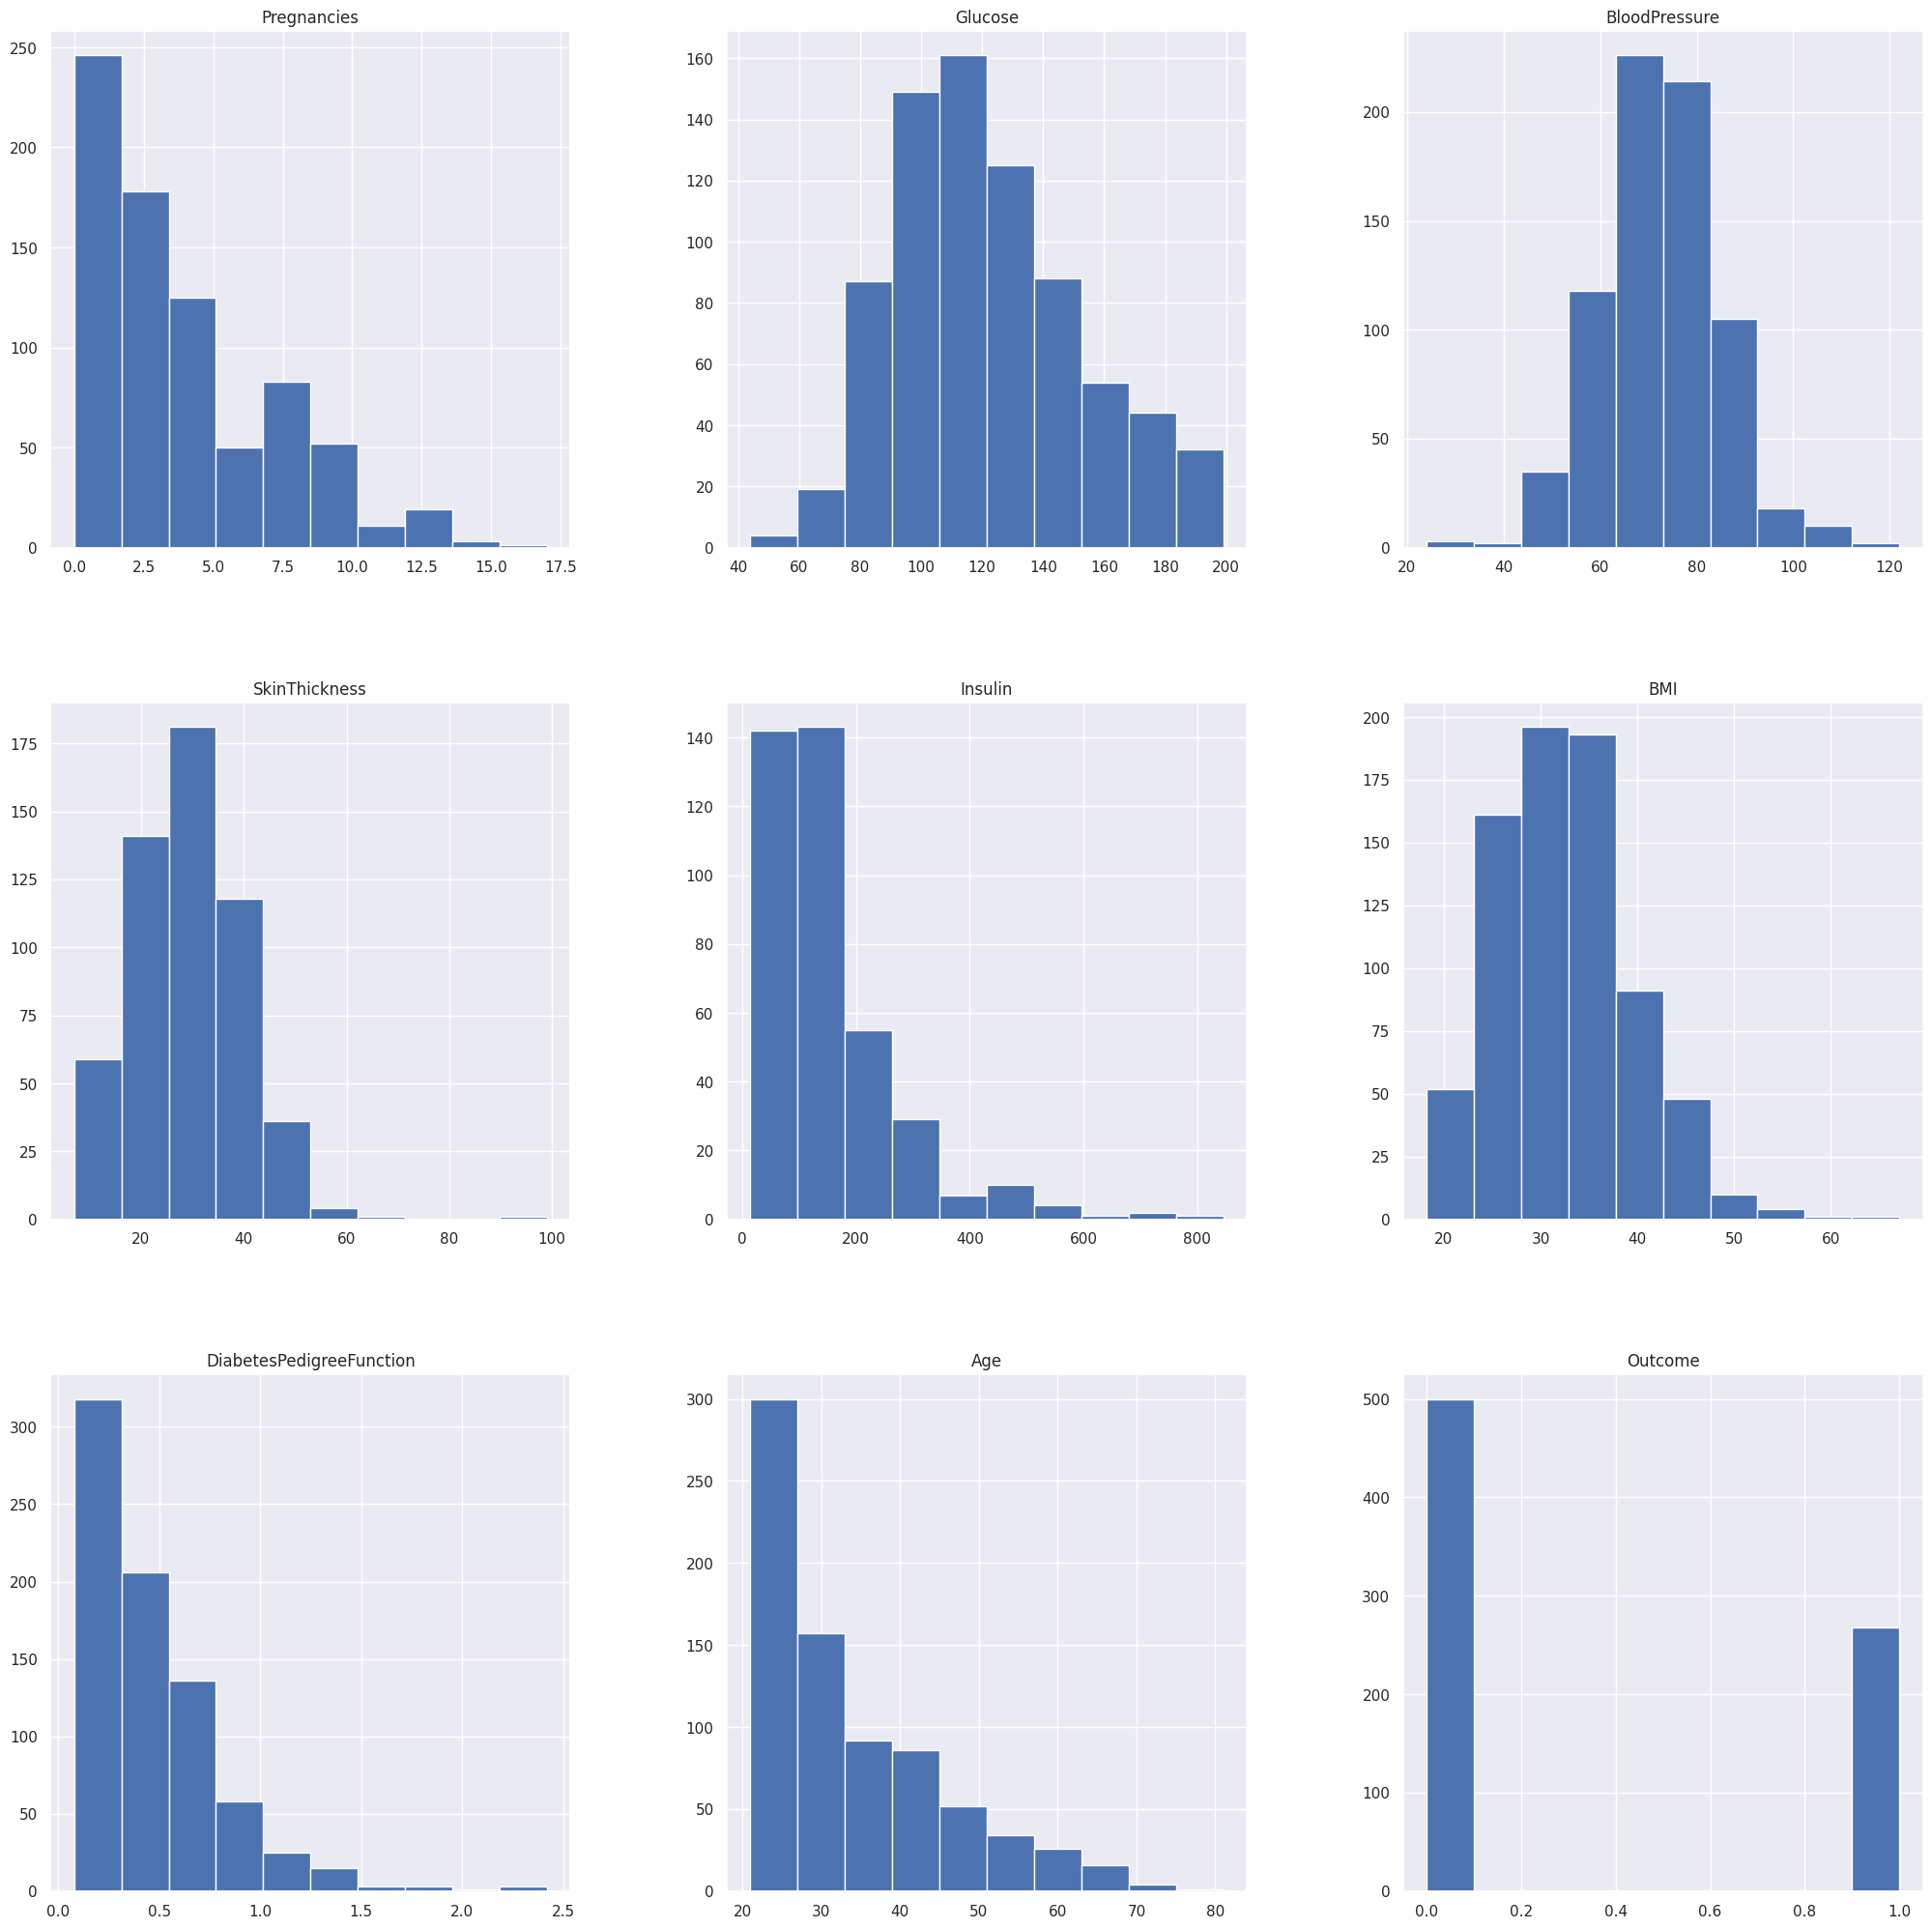

In [ ]:
# Plotting the data distribution plots before removing null values

p = diabetes_df.hist(figsize = (25,25))

In [ ]:
# Now we will be imputing the mean value of the column to each missing value of that particular column.



diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace = True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace = True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace = True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace = True)

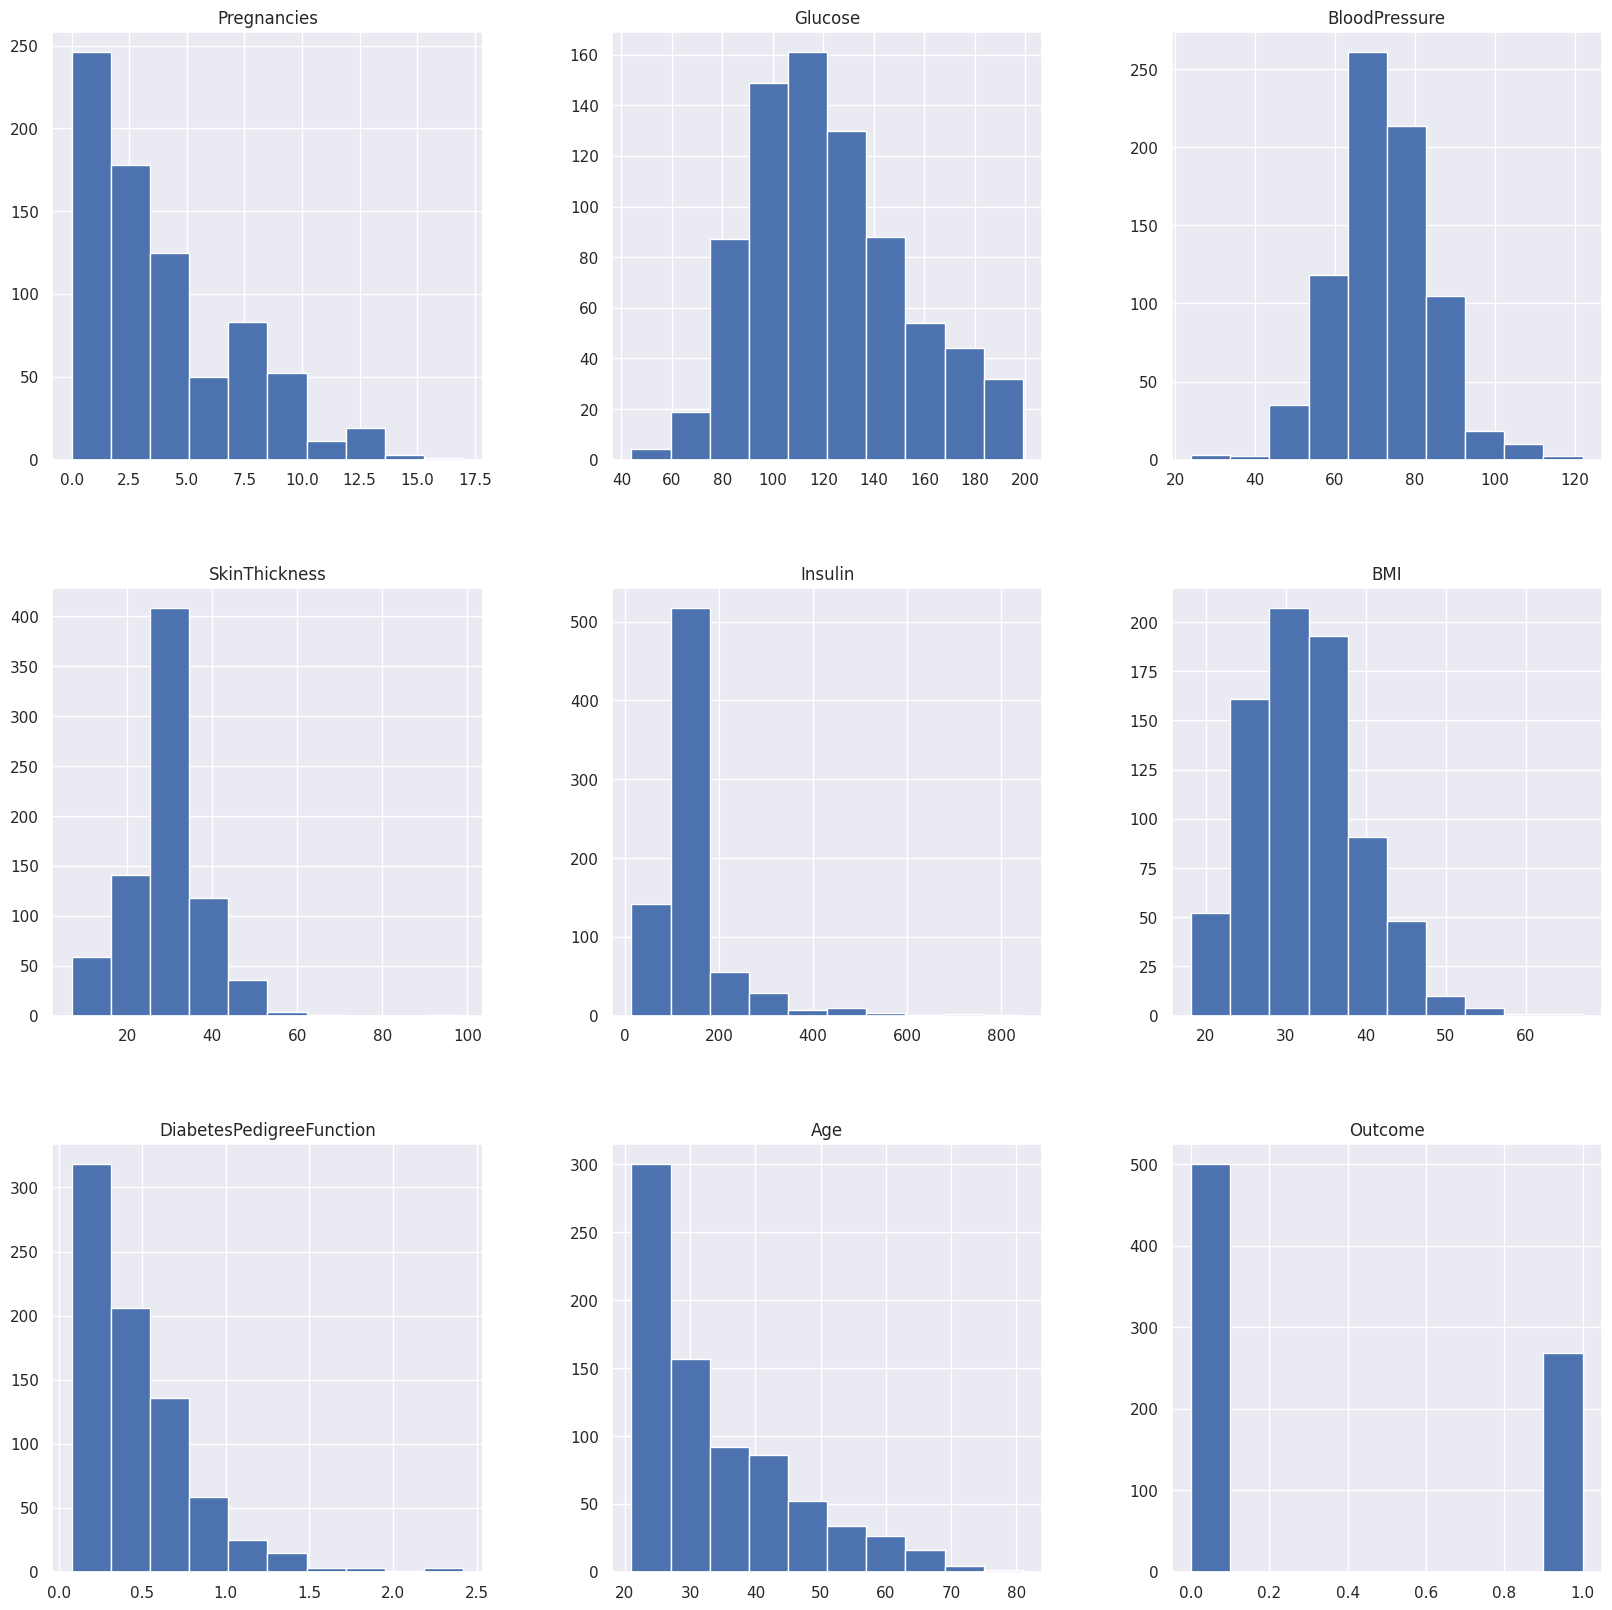

In [ ]:
# Plotting the distributions after removing the NAN values.

p = diabetes_df.hist(figsize = (20,20))

Inference: Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

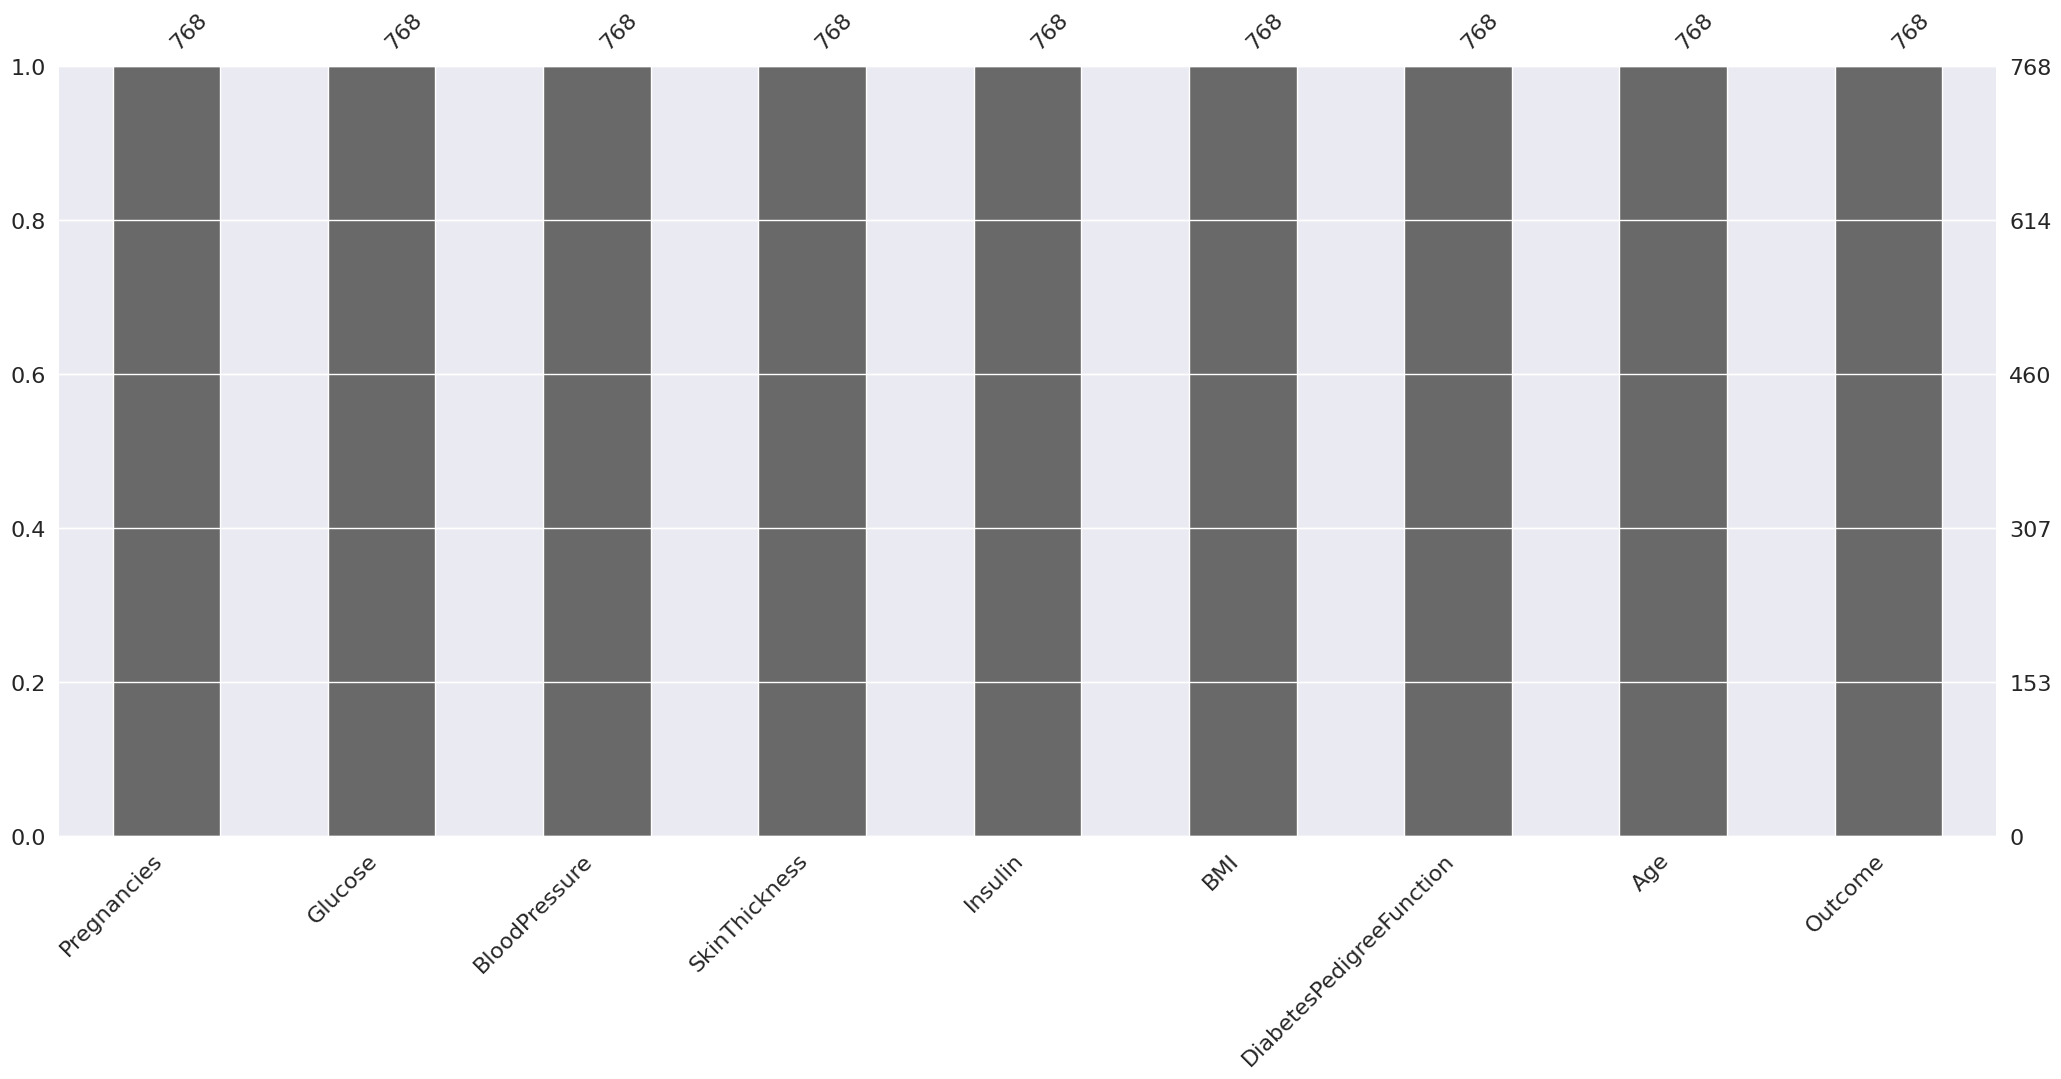

In [ ]:
# Plotting Null Count Analysis Plot

p = msno.bar(diabetes_df)

Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.



Correlation between all the features before cleaning

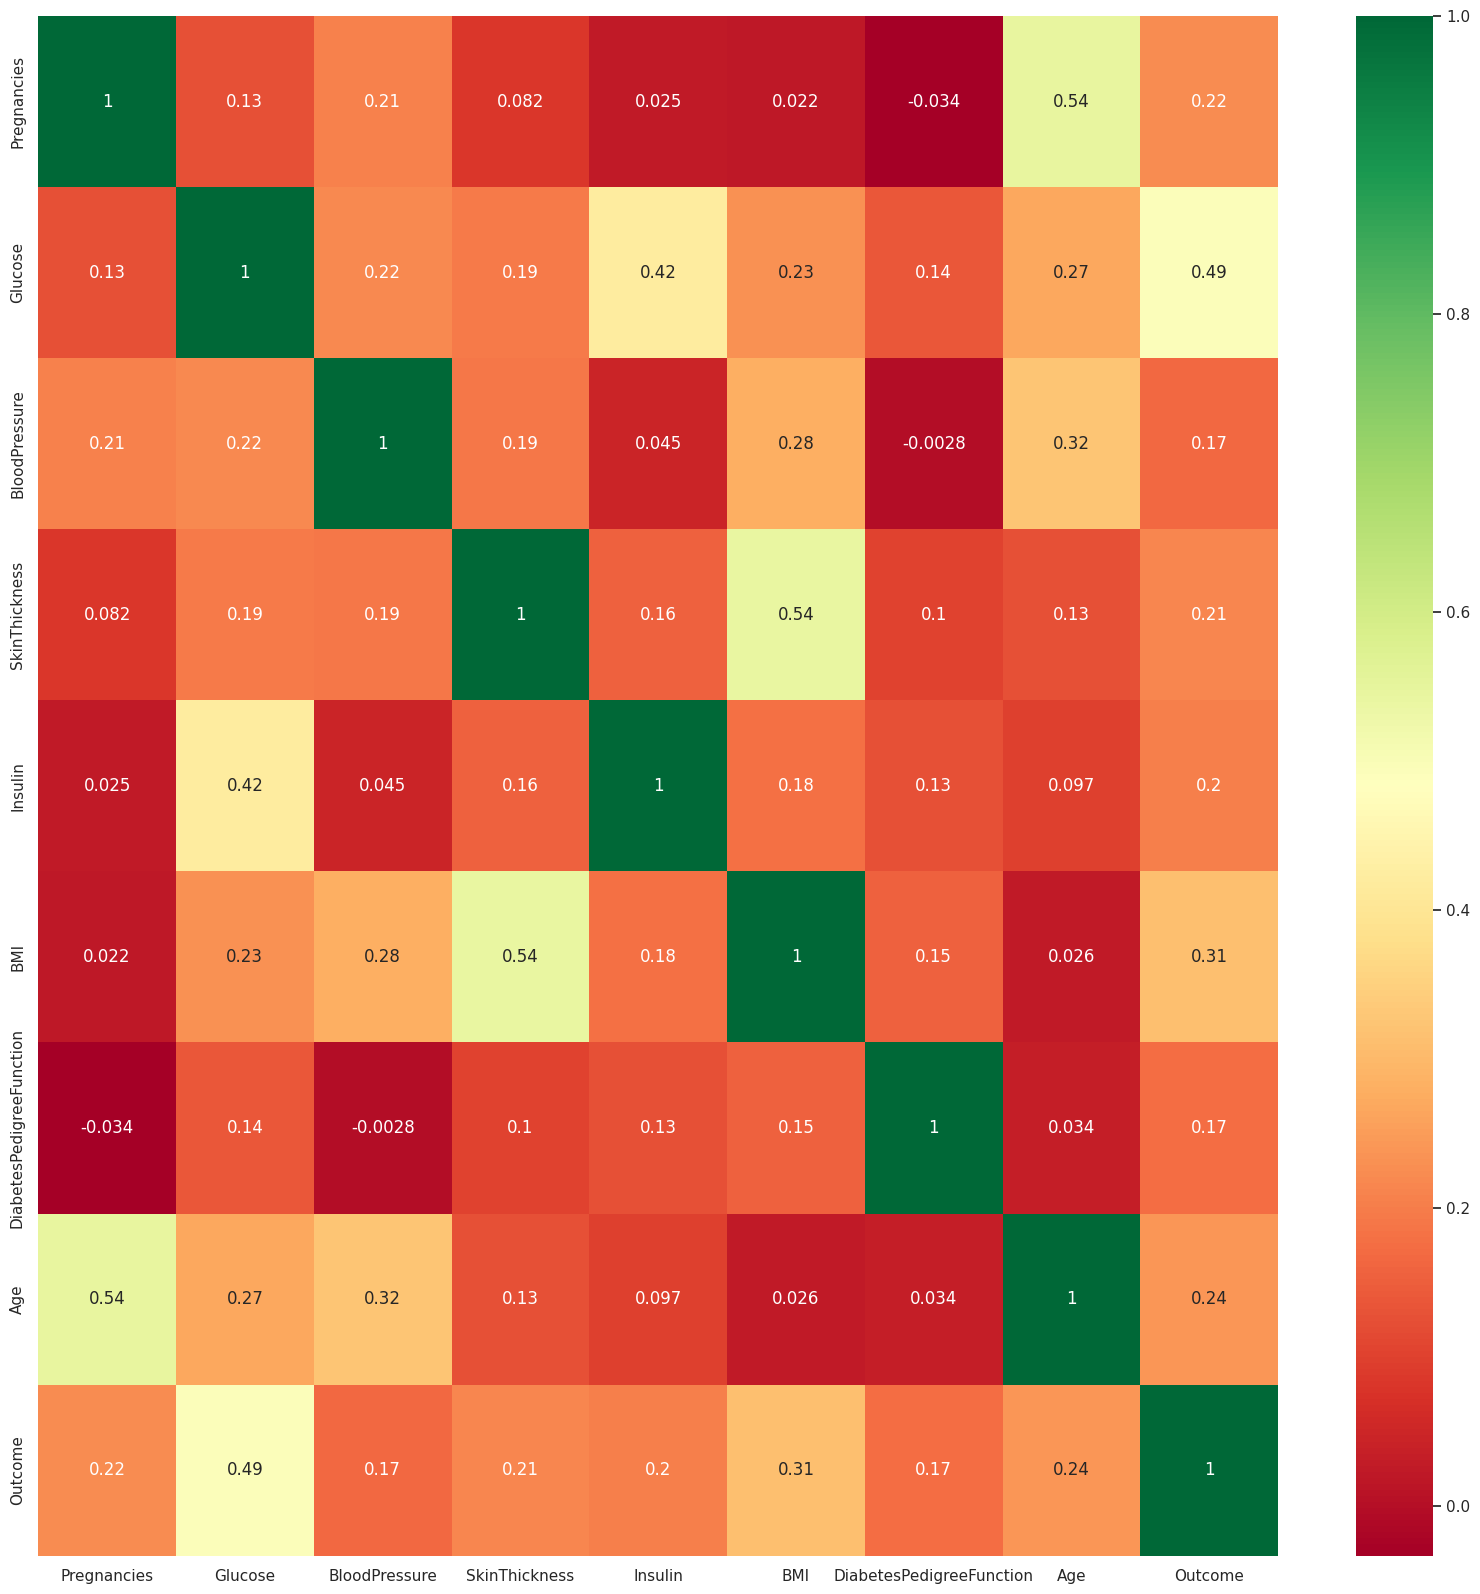

In [ ]:
plt.figure(figsize=(20,20))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
# Scaling the data

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = diabetes_df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

K-Nearest neighbour to predict diabetes

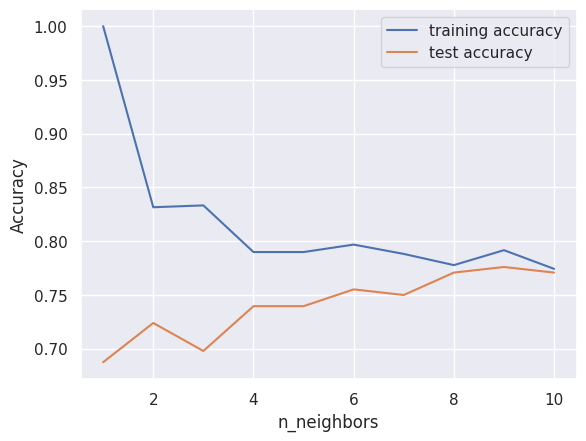

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


Model Building

In [ ]:
# Splitting the dataset

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [ ]:
# Now we will split the data into training and testing data using the train_test_split function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

Random Forest

In [ ]:
# Building the model using random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_rf = rfc.predict(X_test)

In [ ]:
# Now after building the model let’s check the accuracy of the model on the training dataset.

rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
# Getting the accuracy score for Random Forest

from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7637795275590551


In [ ]:
# Classification report and confusion matrix of random forest model

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[137  25]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.62      0.66        92

    accuracy                           0.76       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



Decision Tree

In [ ]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dtree.predict(X_test)

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7125984251968503


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[118  44]
 [ 29  63]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       162
           1       0.59      0.68      0.63        92

    accuracy                           0.71       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.73      0.71      0.72       254



LogisticRegression

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split dataset into features (X) and target variable (y)
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))
print("ROC AUC: {:.2f}%".format(roc_auc*100))


Accuracy: 77.27%
Precision: 69.23%
Recall: 65.45%
F1-score: 67.29%
ROC AUC: 74.65%


Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7662337662337663


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[87 12]
 [24 31]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
rfc.feature_importances_

array([0.07325536, 0.25771167, 0.08734459, 0.08042765, 0.08391532,
       0.15823356, 0.12327769, 0.13583417])

<Axes: >

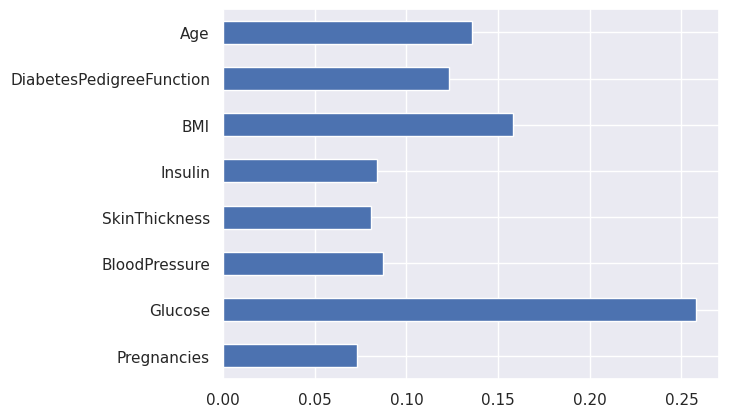

In [ ]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

Optimizer

PSO

In [ ]:
!pip install pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4478 sha256=831776c0168e79d71ed399b21cb8a0bfe3a17d0123cd2b6617fd5b1d36561764
  Stored in directory: /root/.cache/pip/wheels/ff/d2/b7/80118e5698de2bd0b8d1b3397abf7fdfc45c15ffc454b52145
Successfully built pyswarm


In [ ]:
from pyswarm import pso

In [ ]:
def objective_function_Rf(params, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=int(params[0]), max_depth=int(params[1]))

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy

In [ ]:
lb = [15, 12]
ub = [99, 14]

xopt, acc = pso(objective_function_Rf, lb, ub, args=(X_train, y_train, X_test, y_test))

print("Optimal parameters: ", xopt)
print("Accuracy score: ", -acc * 100)

Stopping search: maximum iterations reached --> 100
Optimal parameters:  [15. 12.]
Accuracy score:  81.16883116883116


# Applying PSO Algorithm on RandomForest Classifier

In [ ]:
def objective_function_Rf(params, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=int(params[0]), max_depth=int(params[1]))

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy

In [ ]:
lb = [15, 12]
ub = [99, 14]

xopt, acc = pso(objective_function_Rf, lb, ub, args=(X_train, y_train, X_test, y_test))

print("Optimal parameters: ", xopt)
print("Accuracy score: ", -acc * 100)

Stopping search: maximum iterations reached --> 100
Optimal parameters:  [24.25666496 13.3456736 ]
Accuracy score:  80.51948051948052


# Applying PSO Algorithm on Decision Tree Classifier

In [ ]:
# Applying PSO Algorithm on Decision Tree Classifier
# Define the fitness function for PSO
def fitness_func(x):
    # Train a decision tree classifier with the PSO-selected hyperparameters
    max_depth = int(x[0])
    min_samples_split = int(x[1])
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    # Evaluate the accuracy of the decision tree classifier on the test set
    acc = dt.score(X_test, y_test)
    return -acc  # PSO minimizes the fitness function, so we use negative accuracy

In [ ]:
# Define the bounds for the hyperparameters
lb=[1,10]
ub=[2,20]

# Run PSO to select hyperparameters for the decision tree classifier
x_opt, f_opt = pso(fitness_func, lb,ub)

print("Optimal parameters: ",x_opt)
print("Accuracy Score: ",-f_opt*100)

Stopping search: maximum iterations reached --> 100
Optimal parameters:  [ 2.         13.86316861]
Accuracy Score:  77.27272727272727


# Plot Model vs Accuracy Graph

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_pso_accuracy = -acc

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_pso_accuracy = -f_opt

In [ ]:
# plot grapg for Decision Tree Classifier

def plot_accuracy_comparison(dt_accuracy,dt_pso_accuracy ):
    # Define the labels and data
    labels = ['Decision Tree Classifier', 'Decision Tree Classifier with PSO']
    data = [dt_accuracy, dt_pso_accuracy]

    # Create a bar chart
    fig, ax = plt.subplots()
    bar_width = 0.35
    index = np.arange(len(labels))

    bars = ax.bar(index, data, bar_width, align='center', alpha=0.8, color=['red', 'blue'])

    # Set the labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Comparison')
    ax.set_xticks(index)
    ax.set_xticklabels(labels)

    def add_percentage_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{:.1%}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Add percentage labels to the bars
    add_percentage_labels(bars)

    # Display the chart
    plt.show()

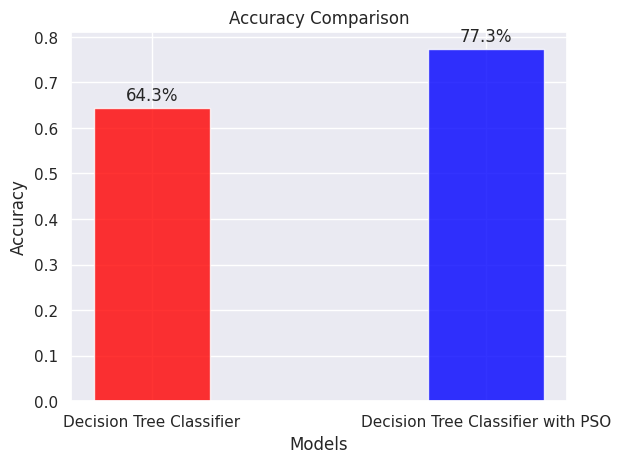

In [ ]:
plot_accuracy_comparison(dt_accuracy,dt_pso_accuracy)